In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [6]:
dataset_path = "C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Brain_Tumor/brain tumour"


In [7]:
image_width,image_height=150,150

In [8]:
datagen=ImageDataGenerator(rescale=1.0/255.0)

In [9]:
train_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'Training'),
    target_size=(image_width,image_height),
    batch_size=32,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.


In [10]:
val_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'Testing'),
    target_size=(image_width,image_height),
    batch_size=32,
    class_mode='categorical'
)

Found 394 images belonging to 4 classes.


In [11]:
model=Sequential([
    Conv2D(32,(2,2),activation='relu',input_shape=(image_width,image_height,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(2,2),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32,(2,2),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax') 
])

C:\Users\Nanda Kisore Biswas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    metrics=['accuracy'],
    loss='categorical_crossentropy',
    optimizer='adam'
)

In [13]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

C:\Users\Nanda Kisore Biswas\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.4960 - loss: 1.1506 - val_accuracy: 0.4569 - val_loss: 1.8682
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 395ms/step - accuracy: 0.7151 - loss: 0.6909 - val_accuracy: 0.5355 - val_loss: 1.8879
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 272ms/step - accuracy: 0.7960 - loss: 0.5175 - val_accuracy: 0.5127 - val_loss: 2.0196
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 278ms/step - accuracy: 0.8419 - loss: 0.3821 - val_accuracy: 0.6218 - val_loss: 2.1551
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 291ms/step - accuracy: 0.8648 - loss: 0.3449 - val_accuracy: 0.6827 - val_loss: 2.0466
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 29s 324ms/step - accuracy: 0.9079 - loss: 0.2472 - val_accuracy: 0.6878 - val_loss: 2.2882
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 291ms/step - accuracy: 0.9204 - loss: 0.2276 - val_accuracy: 0.6878 - val_loss: 2.0203
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 295ms/step - accuracy: 0.9324 - loss: 0.1793 - val_accura

In [14]:
val_loss,val_acc=model.evaluate(val_data)
print("Validation_Loss:",val_loss)
print("Validation_Accuracy:",val_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.7510 - loss: 5.0455
Validation_Loss: 5.234499931335449
Validation_Accuracy: 0.7385786771774292


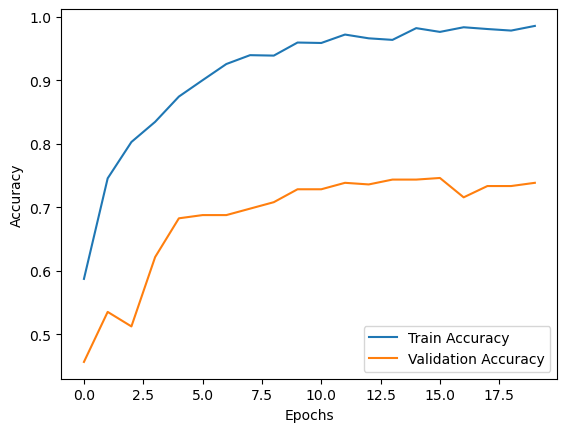

In [15]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

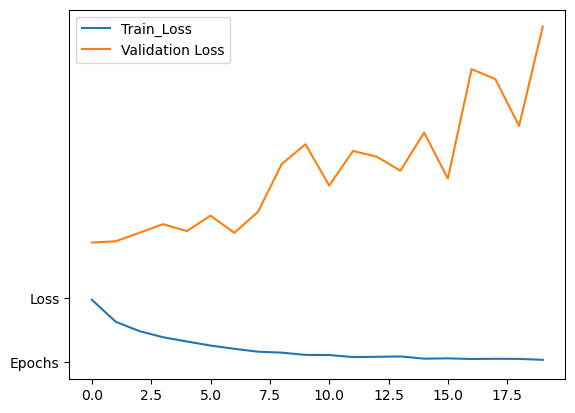

In [16]:
plt.plot(history.history['loss'],label='Train_Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.plot('Epochs')
plt.plot('Loss')
plt.legend()
plt.show()

In [17]:
def predict_image(img_path):
    img=load_img(img_path,target_size=(image_width,image_height))
    image_array=img_to_array(img)/255.0
    image_array=np.expand_dims(image_array,axis=0)
    prediction=model.predict(image_array)
    class_labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
    predicted_class=np.argmax(prediction,axis=1)[0]  #finds the index of the highest probability in the prediction array, indicating the predicted class
    print(f"The model predicts: {class_labels[predicted_class]}")
    plt.imshow(img)
    plt.axis('off')
    plt.plot()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
The model predicts: meningioma_tumor


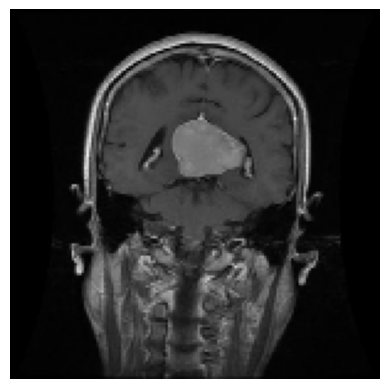

In [18]:
predict_image("C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Brain_Tumor/brain tumour/Training/meningioma_tumor/m (29).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The model predicts: glioma_tumor


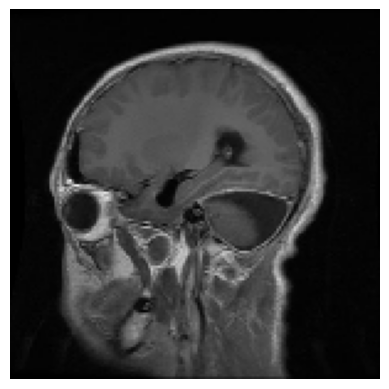

In [19]:
predict_image("C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Brain_Tumor/brain tumour/Training/glioma_tumor/gg (40).jpg")